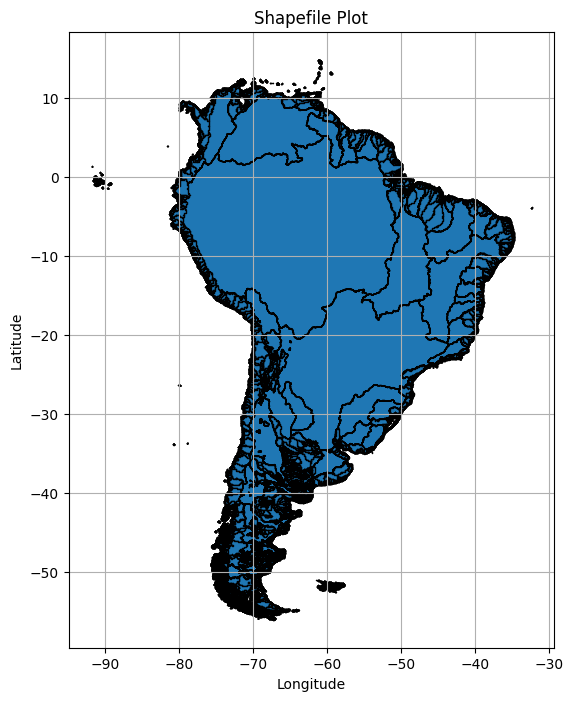

BASIN_ID                                                 57719
AREA_SQKM                                            2593918.8
geometry     POLYGON ((-59.941666666666805 -34.616666666666...
Name: 57718, dtype: object


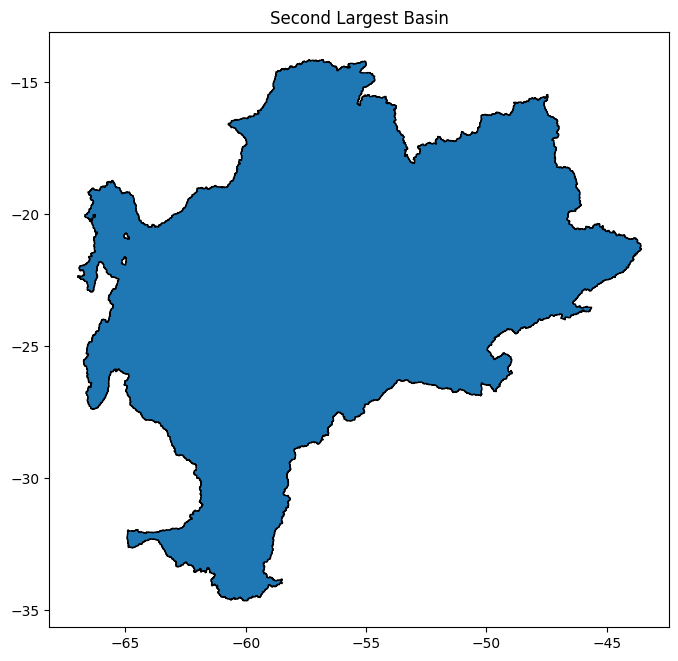

C:\Users\pascalh\AppData\Local\Temp\ipykernel_28820\1021870614.py:39: DtypeWarning: Columns (18,19,23,25,28,29,34,35,38,42,43,44,48,52,53,54,58,63,70,71,75,78,83,87,92,95,96,102,103,104,107,108,109,110,111,117,121,123,124,125,126,127,130,131,135,136,139,141,142,147,149,150,151,153,173,174,177,178,204,210) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/occurrence.txt", sep="\t")


Filtered 320 occurrences within the shape.


In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the shapefile
shapefile_path = "C:/Users/pascalh/OneDrive - VLIZ/Documents/Back-up old VLIZ computer/Documents_20221006/non-VLIZ research/Cichlidae La Plata Bolivia/sa_bas_30s_beta/sa_bas_30s_beta.shp"  # Replace with your path
gdf = gpd.read_file(shapefile_path)

# 2. Plot the shapefile
gdf.plot(edgecolor='black', figsize=(10, 8))

# 3. Customize and show the plot
plt.title("Shapefile Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Sort by area in descending order
gdf_sorted = gdf.sort_values(by="AREA_SQKM", ascending=False)

# Select the second largest
second_largest = gdf_sorted.iloc[1]  # index 1 is the second row after sorting

# Print the result
print(second_largest)

import matplotlib.pyplot as plt

gdf_sorted.iloc[[1]].plot(edgecolor='black', figsize=(8, 8))
plt.title("Second Largest Basin")
plt.show()

import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

# Load the CSV file with coordinates
df = pd.read_csv("../Data/occurrence.txt", sep="\t")

# Drop rows with missing coordinates
df = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Create geometry column from lat/lon
geometry = [Point(xy) for xy in zip(df['decimalLongitude'], df['decimalLatitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS 84


# Get the second largest basin by AREA_SQKM
second_largest_geom = gdf_sorted.iloc[1].geometry
shape_geom = second_largest_geom

# Filter points within the shape
gdf_within = gdf[gdf.within(shape_geom)]

# Save filtered data
gdf_within.to_csv("filtered_occurrences_within_shape.csv", index=False)

print(f"Filtered {len(gdf_within)} occurrences within the shape.")

# Old code

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the shapefile
shapefile_path = "C:/Users/pascalh/OneDrive - VLIZ/Documents/Back-up old VLIZ computer/Documents_20221006/non-VLIZ research/Cichlidae La Plata Bolivia/sa_bas_30s_beta/sa_bas_30s_beta.shp"
gdf = gpd.read_file(shapefile_path)

# 2. Inspect the columns
print(gdf.columns)  # See what's available, especially 'PFAF_ID'

print(gdf)



Index(['BASIN_ID', 'AREA_SQKM', 'geometry'], dtype='object')
        BASIN_ID  AREA_SQKM                                           geometry
0              1        0.8  POLYGON ((-61.17500 14.87500, -61.18333 14.875...
1              2        1.7  POLYGON ((-61.16667 14.86667, -61.17500 14.866...
2              3        1.7  POLYGON ((-61.15833 14.86667, -61.16667 14.866...
3              4        5.8  POLYGON ((-61.15000 14.82500, -61.15833 14.825...
4              5        2.5  POLYGON ((-61.15000 14.85833, -61.15000 14.883...
...          ...        ...                                                ...
163650    163651        1.0  POLYGON ((-67.28333 -55.99167, -67.29167 -55.9...
163651    163652        1.4  POLYGON ((-67.27500 -55.99167, -67.28333 -55.9...
163652    163653        1.0  POLYGON ((-67.26667 -55.99167, -67.27500 -55.9...
163653    163654        0.5  POLYGON ((-67.25833 -55.99167, -67.26667 -55.9...
163654    163655        0.5  POLYGON ((-67.25833 -55.99167, -67.25833 

In [37]:
print(gdf)

        BASIN_ID  AREA_SQKM                                           geometry
0              1        0.8  POLYGON ((-61.17500 14.87500, -61.18333 14.875...
1              2        1.7  POLYGON ((-61.16667 14.86667, -61.17500 14.866...
2              3        1.7  POLYGON ((-61.15833 14.86667, -61.16667 14.866...
3              4        5.8  POLYGON ((-61.15000 14.82500, -61.15833 14.825...
4              5        2.5  POLYGON ((-61.15000 14.85833, -61.15000 14.883...
...          ...        ...                                                ...
163650    163651        1.0  POLYGON ((-67.28333 -55.99167, -67.29167 -55.9...
163651    163652        1.4  POLYGON ((-67.27500 -55.99167, -67.28333 -55.9...
163652    163653        1.0  POLYGON ((-67.26667 -55.99167, -67.27500 -55.9...
163653    163654        0.5  POLYGON ((-67.25833 -55.99167, -67.26667 -55.9...
163654    163655        0.5  POLYGON ((-67.25833 -55.99167, -67.25833 -55.9...

[163655 rows x 3 columns]


BASIN_ID                                                 57719
AREA_SQKM                                            2593918.8
geometry     POLYGON ((-59.941666666666805 -34.616666666666...
Name: 57718, dtype: object


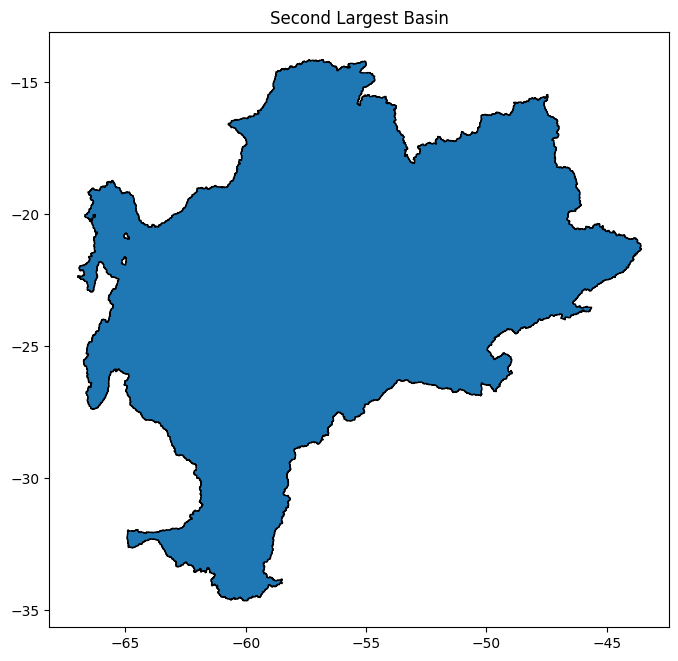

In [38]:
# Sort by area in descending order
gdf_sorted = gdf.sort_values(by="AREA_SQKM", ascending=False)

# Select the second largest
second_largest = gdf_sorted.iloc[1]  # index 1 is the second row after sorting

# Print the result
print(second_largest)

import matplotlib.pyplot as plt

gdf_sorted.iloc[[1]].plot(edgecolor='black', figsize=(8, 8))
plt.title("Second Largest Basin")
plt.show()

In [47]:
from pygbif import occurrences as occ
import geopandas as gpd

# Load the shapefile
#gdf = gpd.read_file("path/to/sa_bas_30s_beta.shp")

# Get the second largest basin by AREA_SQKM
#gdf_sorted = gdf.sort_values(by="AREA_SQKM", ascending=False)
second_largest_geom = gdf_sorted.iloc[1].geometry

# Convert to WKT
wkt = second_largest_geom.wkt
print("WKT:", wkt[:100] + "...")  # preview only the first 100 characters

print(wkt)

WKT: POLYGON ((-59.941666666666805 -34.61666666666675, -59.98333333333347 -34.61666666666675, -59.9833333...
POLYGON ((-59.941666666666805 -34.61666666666675, -59.98333333333347 -34.61666666666675, -59.98333333333347 -34.60833333333342, -60.00833333333347 -34.60833333333342, -60.00833333333347 -34.60000000000009, -60.0166666666668 -34.60000000000009, -60.0166666666668 -34.60833333333342, -60.05833333333347 -34.60833333333342, -60.05833333333347 -34.61666666666675, -60.1166666666668 -34.61666666666675, -60.1166666666668 -34.60000000000009, -60.125000000000135 -34.60000000000009, -60.125000000000135 -34.591666666666754, -60.13333333333347 -34.591666666666754, -60.13333333333347 -34.58333333333342, -60.1416666666668 -34.58333333333342, -60.1416666666668 -34.57500000000009, -60.15833333333347 -34.57500000000009, -60.15833333333347 -34.55000000000009, -60.166666666666806 -34.55000000000009, -60.166666666666806 -34.54166666666676, -60.18333333333347 -34.54166666666676, -60.18333333333347 -34

In [9]:
import requests

try:
    response = requests.get("https://api.gbif.org/v1/occurrence/search", timeout=10)
    print(response.status_code)
except requests.exceptions.SSLError as e:
    print("SSL error:", e)

200


In [10]:
from shapely.geometry import mapping

# Simplify the geometry with a tolerance (in degrees; tweak as needed)
simplified_geom = second_largest_geom.simplify(tolerance=0.05, preserve_topology=True)

# Convert to WKT
wkt = simplified_geom.wkt

In [34]:
# Convert to WKT
#wkt = gdf_simplified.wkt
#wkt = second_largest_geom.wkt
#wkt = gdf_simplified.geometry.iloc[0].wkt
wkt = wkt_cleaned
print("WKT:", wkt[:100] + "...")  # preview only the first 100 characters

# Use it in a GBIF query
results = occ.search(geometry=wkt, limit=100)

# Print a few results
for rec in results['results']:
    print(f"{rec.get('species')} at {rec.get('decimalLatitude')}, {rec.get('decimalLongitude')}")


WKT: POLYGON ((-59.941666666666805 -34.61666666666675, -64.90833333333345 -32.575000000000095, -61.866666...


HTTPError: 400 Client Error: Bad Request for url: https://api.gbif.org/v1/occurrence/search?geometry=POLYGON+%28%28-59.941666666666805+-34.61666666666675%2C+-64.90833333333345+-32.575000000000095%2C+-61.8666666666668+-30.125000000000107%2C+-64.90000000000012+-26.033333333333452%2C+-66.56666666666678+-27.166666666666785%2C+-66.57500000000012+-19.150000000000148%2C+-63.766666666666794+-20.475000000000144%2C+-60.7666666666668+-18.94166666666682%2C+-60.7416666666668+-16.558333333333493%2C+-57.38333333333348+-14.141666666666836%2C+-55.05833333333349+-14.20000000000017%2C+-53.05000000000017+-18.058333333333486%2C+-47.46666666666685+-15.458333333333496%2C+-46.59166666666686+-20.34166666666681%2C+-43.583333333333535+-21.316666666666805%2C+-49.67500000000018+-24.650000000000126%2C+-49.616666666666845+-26.700000000000117%2C+-53.725000000000165+-26.27500000000012%2C+-57.97500000000014+-28.85833333333344%2C+-59.941666666666805+-34.61666666666675%29%29&limit=100&offset=0

In [29]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

# Load the shapefile
#gdf = gpd.read_file("your/path/sa_bas_30s_beta.shp")

# Get the second largest geometry by area
#gdf_sorted = gdf.sort_values(by="AREA_SQKM", ascending=False)
geom = gdf_sorted.iloc[1].geometry

# Function to count exterior coordinates
def count_points(geometry):
    if isinstance(geometry, Polygon):
        return len(geometry.exterior.coords)
    elif isinstance(geometry, MultiPolygon):
        return sum(len(p.exterior.coords) for p in geometry.geoms)
    return 0

# Start with low tolerance and increase until we get ~50 points
target_points = 20
tolerance = 0.001
simplified = geom.simplify(tolerance, preserve_topology=True)

while count_points(simplified) > target_points and tolerance < 5:
    tolerance += 0.001
    simplified = geom.simplify(tolerance, preserve_topology=True)

print(f"Final tolerance used: {tolerance:.3f}")
print(f"Resulting number of points: {count_points(simplified)}")

# Save simplified geometry as new shapefile
gdf_simplified = gpd.GeoDataFrame(geometry=[simplified], crs=gdf.crs)
gdf_simplified.to_file("la_plata_simplified_50pts.shp")


Final tolerance used: 1.272
Resulting number of points: 20


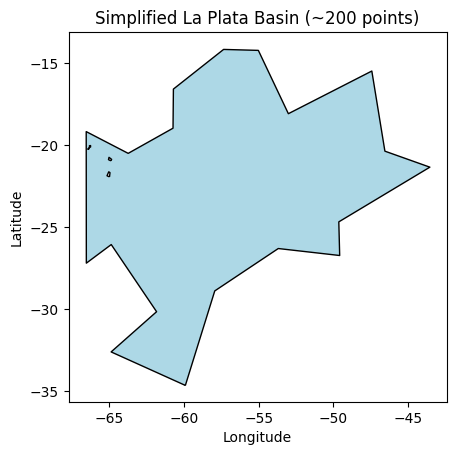

In [30]:
import matplotlib.pyplot as plt

gdf_simplified.plot(edgecolor='black', facecolor='lightblue')
plt.title("Simplified La Plata Basin (~200 points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [33]:
from shapely.geometry import Polygon, MultiPolygon

# Assuming `geom` is your simplified geometry
def remove_holes(geometry):
    if isinstance(geometry, Polygon):
        # Keep only the exterior ring
        return Polygon(geometry.exterior)
    elif isinstance(geometry, MultiPolygon):
        # Do the same for each polygon in a MultiPolygon
        no_holes = [Polygon(p.exterior) for p in geometry.geoms]
        return MultiPolygon(no_holes)
    else:
        raise ValueError("Geometry must be Polygon or MultiPolygon")

# Apply the hole-removal
no_holes_geom = remove_holes(simplified)

# Convert to WKT
wkt_cleaned = no_holes_geom.wkt
print(wkt_cleaned)

POLYGON ((-59.941666666666805 -34.61666666666675, -64.90833333333345 -32.575000000000095, -61.8666666666668 -30.125000000000107, -64.90000000000012 -26.033333333333452, -66.56666666666678 -27.166666666666785, -66.57500000000012 -19.150000000000148, -63.766666666666794 -20.475000000000144, -60.7666666666668 -18.94166666666682, -60.7416666666668 -16.558333333333493, -57.38333333333348 -14.141666666666836, -55.05833333333349 -14.20000000000017, -53.05000000000017 -18.058333333333486, -47.46666666666685 -15.458333333333496, -46.59166666666686 -20.34166666666681, -43.583333333333535 -21.316666666666805, -49.67500000000018 -24.650000000000126, -49.616666666666845 -26.700000000000117, -53.725000000000165 -26.27500000000012, -57.97500000000014 -28.85833333333344, -59.941666666666805 -34.61666666666675))


In [35]:
from pygbif import occurrences
import pandas as pd

# Orders of interest
orders = ["Siluriformes", "Cyprinodontiformes", "Characiformes", "Gymnotiformes", "Beloniformes", "Pleuronectiformes", "Cypriniformes", "Synbranchiformes", "Myliobatiformes", "Clupeiformes", "Acanthuriformes", "Ceratodontiformes", "Atheriniformes"]
country = "BO"  # ISO 3166-1 alpha-2 code for Bolivia

# Collect all occurrences into a list
all_occurrences = []

for order in orders:
    # Paginate through the results if necessary (limit is 300 by default)
    offset = 0
    limit = 300
    while True:
        results = occurrences.search(
            country=country,
            order=order,
            hasCoordinate=True,
            offset=offset,
            limit=limit
        )
        all_occurrences.extend(results['results'])
        if len(results['results']) < limit:
            break
        offset += limit

# Convert to a pandas DataFrame
df = pd.DataFrame(all_occurrences)

# Filter relevant columns
columns_to_keep = ['species', 'scientificName', 'decimalLatitude', 'decimalLongitude', 'order', 'family', 'genus', 'eventDate', 'basisOfRecord']
df = df[columns_to_keep]

# Save to CSV
df.to_csv("bolivia_fish_occurrences.csv", index=False)
print("Downloaded and saved to bolivia_fish_occurrences.csv")


KeyboardInterrupt: 

In [50]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

# Load the CSV file with coordinates
df = pd.read_csv("../Data/occurrence.txt", sep="\t")

# Drop rows with missing coordinates
df = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Create geometry column from lat/lon
geometry = [Point(xy) for xy in zip(df['decimalLongitude'], df['decimalLatitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS 84



# Convert WKT to shapely geometry
shape_geom = second_largest_geom

# Filter points within the shape
gdf_within = gdf[gdf.within(shape_geom)]

# Save filtered data
gdf_within.to_csv("filtered_occurrences_within_shape.csv", index=False)

print(f"Filtered {len(gdf_within)} occurrences within the shape.")


C:\Users\pascalh\AppData\Local\Temp\ipykernel_28820\1520359369.py:7: DtypeWarning: Columns (18,19,23,25,28,29,34,35,38,42,43,44,48,52,53,54,58,63,70,71,75,78,83,87,92,95,96,102,103,104,107,108,109,110,111,117,121,123,124,125,126,127,130,131,135,136,139,141,142,147,149,150,151,153,173,174,177,178,204,210) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/occurrence.txt", sep="\t")


Filtered 320 occurrences within the shape.


In [49]:
print(wkt)
shape_geom = second_largest_geom

POLYGON ((-59.941666666666805 -34.61666666666675, -59.98333333333347 -34.61666666666675, -59.98333333333347 -34.60833333333342, -60.00833333333347 -34.60833333333342, -60.00833333333347 -34.60000000000009, -60.0166666666668 -34.60000000000009, -60.0166666666668 -34.60833333333342, -60.05833333333347 -34.60833333333342, -60.05833333333347 -34.61666666666675, -60.1166666666668 -34.61666666666675, -60.1166666666668 -34.60000000000009, -60.125000000000135 -34.60000000000009, -60.125000000000135 -34.591666666666754, -60.13333333333347 -34.591666666666754, -60.13333333333347 -34.58333333333342, -60.1416666666668 -34.58333333333342, -60.1416666666668 -34.57500000000009, -60.15833333333347 -34.57500000000009, -60.15833333333347 -34.55000000000009, -60.166666666666806 -34.55000000000009, -60.166666666666806 -34.54166666666676, -60.18333333333347 -34.54166666666676, -60.18333333333347 -34.533333333333424, -60.20000000000014 -34.533333333333424, -60.20000000000014 -34.52500000000009, -60.20833333